In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
dataset=pd.read_csv("kidney_disease.csv")
quan=[]
qual=[]
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
df=pd.DataFrame(dataset)
dfid=pd.DataFrame(dataset['id'])

In [4]:
df=df.drop(["id"],axis=1)
dataset=df

SPLITTING QUANTITATIVE AND QUALITATIVE COLUMNS

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [6]:
from Univariate import univar
u=univar(dataset)
qual,quan=u.quanqual()

PREPROCESSING

In [7]:
dataset.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

Filled the missing data with median

In [8]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=np.nan,strategy="median")
impute=impute.fit(dataset[quan])
imtable=pd.DataFrame(impute.transform(dataset[quan]).round())
dataset[quan]=imtable

Filled the missing data with most frequent value

In [9]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
impute=impute.fit(dataset[qual])
imptable=pd.DataFrame(impute.transform(dataset[qual]))
dataset[qual]=imptable

In [10]:
df.insert(0,"id",dfid)
dataset=df

In [11]:
dataset.to_csv("prekidney.csv",index=False) # saving preprocessed data to new csv file

In [12]:
dataset=pd.read_csv("prekidney.csv") #Reading Preprocessed CSV file

In [13]:
dataset.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [14]:
dataset.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,400.000000,400.000000,400.0,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.562500,76.575000,1.0,0.90000,0.395000,145.062500,56.695000,2.967500,137.630000,4.527500,12.592500
std,115.614301,16.982996,13.489785,0.0,1.31313,1.040038,75.260774,49.394753,5.631672,9.224469,2.831835,2.720284
min,0.000000,2.000000,50.000000,1.0,0.00000,0.000000,22.000000,2.000000,0.000000,4.000000,2.000000,3.000000
25%,99.750000,42.000000,70.000000,1.0,0.00000,0.000000,101.000000,27.000000,1.000000,135.000000,4.000000,11.000000
50%,199.500000,55.000000,80.000000,1.0,0.00000,0.000000,121.000000,42.000000,1.000000,138.000000,4.000000,13.000000
75%,299.250000,64.000000,80.000000,1.0,2.00000,0.000000,150.000000,61.750000,3.000000,141.000000,5.000000,15.000000
max,399.000000,90.000000,180.000000,1.0,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,18.000000


Explanation for above output:
Age:
25% of people in the dataset are within age 42
50% of people in the dataset are within age 55
50% of people in the dataset are within age 64
BP:
25% of people in the dataset are within age 70
50% of people in the dataset are within age 80
50% of people in the dataset are within age 80

In [15]:
centraluni=pd.DataFrame(index=["Mean","Median","Mode","Q1:25","Q2:50","Q3:75","Q4:100","IQR","1.5*IQR","Lesser","Greater","Min","Max"],columns=quan)

In [ ]:
for cname in quan:
    centraluni[cname]["Mean"]=dataset[cname].mean()
    centraluni[cname]["Median"]=dataset[cname].median()
    centraluni[cname]["Mode"]=dataset[cname].mode()[0]
    centraluni[cname]["Q1:25"]=dataset.describe()[cname]["25%"]
    centraluni[cname]["Q2:50"]=dataset.describe()[cname]["50%"]
    centraluni[cname]["Q3:75"]=dataset.describe()[cname]["75%"]
    centraluni[cname]["Q4:100"]=np.percentile(dataset[cname],100)
    centraluni[cname]["IQR"]=centraluni[cname]["Q3:75"]-centraluni[cname]["Q1:25"]
    centraluni[cname]["1.5*IQR"]=1.5*centraluni[cname]["IQR"]
    centraluni[cname]["Lesser"]=centraluni[cname]["Q1:25"]-centraluni[cname]["1.5*IQR"]
    centraluni[cname]["Greater"]= centraluni[cname]["Q3:75"]+centraluni[cname]["1.5*IQR"]
    centraluni[cname]["Min"]=dataset[cname].min()
    centraluni[cname]["Max"]=dataset[cname].max()

In [17]:
centraluni

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
Mean,51.5625,76.575,1.0,0.9,0.395,145.0625,56.695,2.9675,137.63,4.5275,12.5925
Median,55.0,80.0,1.0,0.0,0.0,121.0,42.0,1.0,138.0,4.0,13.0
Mode,55.0,80.0,1.0,0.0,0.0,121.0,42.0,1.0,138.0,4.0,13.0
Q1:25,42.0,70.0,1.0,0.0,0.0,101.0,27.0,1.0,135.0,4.0,11.0
Q2:50,55.0,80.0,1.0,0.0,0.0,121.0,42.0,1.0,138.0,4.0,13.0
Q3:75,64.0,80.0,1.0,2.0,0.0,150.0,61.75,3.0,141.0,5.0,15.0
Q4:100,90.0,180.0,1.0,5.0,5.0,490.0,391.0,76.0,163.0,47.0,18.0
IQR,22.0,10.0,0.0,2.0,0.0,49.0,34.75,2.0,6.0,1.0,4.0
1.5*IQR,33.0,15.0,0.0,3.0,0.0,73.5,52.125,3.0,9.0,1.5,6.0
Lesser,9.0,55.0,1.0,-3.0,0.0,27.5,-25.125,-2.0,126.0,2.5,5.0


Process of finding outliers by checking that Min is lessthan Lesser(Q1-1.5*IQR) and max is greater than Greater((Q3+1.5*IQR)

In [18]:
Lesser=[]
Greater=[]
for cname in quan:
    if centraluni[cname]["Min"] < centraluni[cname]["Lesser"]:
        Lesser.append(cname)
    if centraluni[cname]["Max"] > centraluni[cname]["Greater"]:
        Greater.append(cname)    

In [19]:
Lesser

['age', 'bp', 'bgr', 'sod', 'pot', 'hemo']

In [20]:
Greater

['bp', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot']

ELIMINATING OUTLIERS

In [ ]:
for cname in Lesser:
    dataset[cname][dataset[cname] < centraluni[cname]["Lesser"]]=centraluni[cname]["Lesser"]
for cname in Greater:
    dataset[cname][dataset[cname] > centraluni[cname]["Greater"]]=centraluni[cname]["Greater"] 

In [ ]:
for cname in quan:
    centraluni[cname]["Mean"]=dataset[cname].mean()
    centraluni[cname]["Median"]=dataset[cname].median()
    centraluni[cname]["Mode"]=dataset[cname].mode()[0]
    centraluni[cname]["Q1:25"]=dataset.describe()[cname]["25%"]
    centraluni[cname]["Q2:50"]=dataset.describe()[cname]["50%"]
    centraluni[cname]["Q3:75"]=dataset.describe()[cname]["75%"]
    centraluni[cname]["Q4:100"]=np.percentile(dataset[cname],100)
    centraluni[cname]["IQR"]=centraluni[cname]["Q3:75"]-centraluni[cname]["Q1:25"]
    centraluni[cname]["1.5*IQR"]=1.5*centraluni[cname]["IQR"]
    centraluni[cname]["Lesser"]=centraluni[cname]["Q1:25"]-centraluni[cname]["1.5*IQR"]
    centraluni[cname]["Greater"]= centraluni[cname]["Q3:75"]+centraluni[cname]["1.5*IQR"]
    centraluni[cname]["Min"]=dataset[cname].min()
    centraluni[cname]["Max"]=dataset[cname].max()

In [34]:
centraluni

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
Mean,51.6475,75.825,1.0,0.9,0.0,134.01125,50.279688,2.1175,138.2175,4.3425,12.5975
Median,55.0,80.0,1.0,0.0,0.0,121.0,42.0,1.0,138.0,4.0,13.0
Mode,55.0,80.0,1.0,0.0,0.0,223.5,113.875,1.0,138.0,4.0,13.0
Q1:25,42.0,70.0,1.0,0.0,0.0,101.0,27.0,1.0,135.0,4.0,11.0
Q2:50,55.0,80.0,1.0,0.0,0.0,121.0,42.0,1.0,138.0,4.0,13.0
Q3:75,64.0,80.0,1.0,2.0,0.0,150.0,61.75,3.0,141.0,5.0,15.0
Q4:100,90.0,95.0,1.0,5.0,0.0,223.5,113.875,6.0,150.0,6.5,18.0
IQR,22.0,10.0,0.0,2.0,0.0,49.0,34.75,2.0,6.0,1.0,4.0
1.5*IQR,33.0,15.0,0.0,3.0,0.0,73.5,52.125,3.0,9.0,1.5,6.0
Lesser,9.0,55.0,1.0,-3.0,0.0,27.5,-25.125,-2.0,126.0,2.5,5.0


In [23]:
Lesser=[]
Greater=[]
for cname in quan:
    if centraluni[cname]["Min"] < centraluni[cname]["Lesser"]:
        Lesser.append(cname)
    if centraluni[cname]["Max"] > centraluni[cname]["Greater"]:
        Greater.append(cname)

In [24]:
Lesser

[]

In [25]:
Greater

[]

Frequency is finding each value which is repeating and how mwny times it get repeated.It helps in finding the critical values to improve the 
important function

In [26]:
def frequency(cname,dataset):
    freq=pd.DataFrame(columns=["Unique Values","Frequency","Relative Frequency","CRF"])
    freq["Unique Values"]=dataset[cname].value_counts().index
    freq["Frequency"]=dataset[cname].value_counts().values
    freq["Relative Frequency"]=dataset[cname].value_counts().values/len(freq)
    freq["CRF"]=freq["Relative Frequency"].cumsum()
    skewness=dataset[cname].skew()
    kurtosis=dataset[cname].kurtosis()
    Variance=dataset[cname].var()
    std=dataset[cname].std()
    return freq,skewness,kurtosis,Variance,std

In [27]:
for cname in quan:   
    freq,skewness,kurtosis,variance,std=frequency(cname,dataset)     
    print("\n\n",cname,"\n\n")
    print(freq)
    print("\n\nskewness value of",cname,"=",skewness)
    print("\n\nKurtosis value of",cname,"=",kurtosis)
    print("\n\nVariance value of",cname,"=",variance)
    print("\n\nSD value of",cname,"=",std)



 age 


    Unique Values  Frequency  Relative Frequency       CRF
0            55.0         21            0.300000  0.300000
1            60.0         19            0.271429  0.571429
2            65.0         17            0.242857  0.814286
3            48.0         12            0.171429  0.985714
4            50.0         12            0.171429  1.157143
..            ...        ...                 ...       ...
65           14.0          1            0.014286  5.657143
66           81.0          1            0.014286  5.671429
67           11.0          1            0.014286  5.685714
68           26.0          1            0.014286  5.700000
69           79.0          1            0.014286  5.714286

[70 rows x 4 columns]


skewness value of age = -0.6222064032922697


Kurtosis value of age = -0.07621934738870939


Variance value of age = 280.76515664160394


SD value of age = 16.756048359968528


 bp 


   Unique Values  Frequency  Relative Frequency        CRF
0           80

In [28]:
from statsmodels.distributions.empirical_distribution import ECDF
def cal_PDF(dataset):
    for cname in quan:
        print("Enter the start range,endrange,no for PDF",cname)
        sr=int(input())
        er=int(input())
        no=int(input())
        ax=sb.distplot(dataset[cname],kde=True,kde_kws={'color':'pink'},color='Green')
        plt.axvline(sr,color='yellow')
        plt.axvline(er,color='yellow')
        plt.show()
        mean=dataset[cname].mean()
        std=dataset[cname].std()
        normdist=norm(mean,std)
        values=[value for value in range(sr,er)]
        probabilities=[normdist.pdf(value) for value in values]
        prob=sum(probabilities)
        probpercentage=prob*100
        ecdf=ECDF(dataset[cname])
        ecdfout=ecdf(no)
        print("The area of",cname," between the range ({},{}):({},{}){}".format(sr,er,prob,probpercentage,ecdfout))
    return

Enter the start range,endrange,no for PDF age


 60
 70
 80


C:\Users\Admin\AppData\Local\Temp\ipykernel_1132\3399699182.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sb.distplot(dataset[cname],kde=True,kde_kws={'color':'pink'},color='Green')


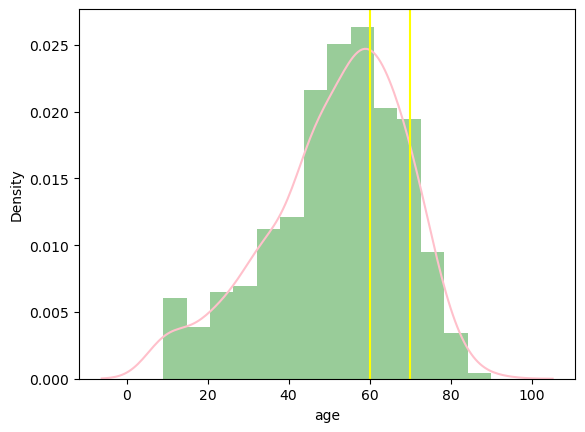

The area of age  between the range (60,70):(0.1763362540523982,17.63362540523982)0.99
Enter the start range,endrange,no for PDF bp


 60
 90
 80


C:\Users\Admin\AppData\Local\Temp\ipykernel_1132\3399699182.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sb.distplot(dataset[cname],kde=True,kde_kws={'color':'pink'},color='Green')


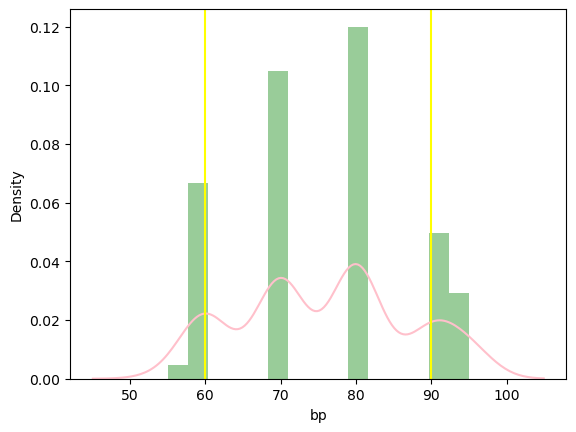

The area of bp  between the range (60,90):(0.8254640096375259,82.54640096375259)0.7899999999999999
Enter the start range,endrange,no for PDF sg


 1
 1
 1


C:\Users\Admin\AppData\Local\Temp\ipykernel_1132\3399699182.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sb.distplot(dataset[cname],kde=True,kde_kws={'color':'pink'},color='Green')
C:\Anaconda3\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


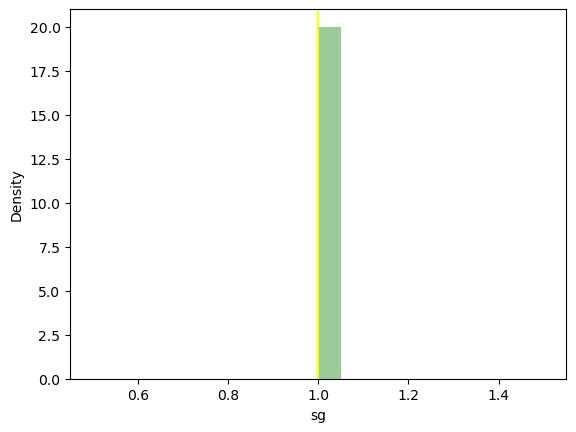

The area of sg  between the range (1,1):(0,0)1.0
Enter the start range,endrange,no for PDF al


 1
 2
 1


C:\Users\Admin\AppData\Local\Temp\ipykernel_1132\3399699182.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sb.distplot(dataset[cname],kde=True,kde_kws={'color':'pink'},color='Green')


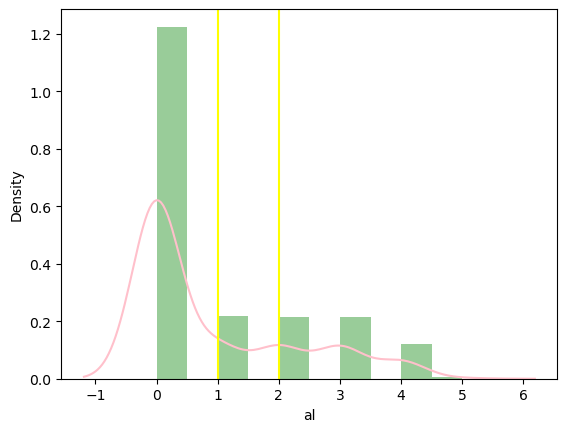

The area of al  between the range (1,2):(0.30293047567205383,30.293047567205384)0.7224999999999999
Enter the start range,endrange,no for PDF su


 1
 2
 1


C:\Users\Admin\AppData\Local\Temp\ipykernel_1132\3399699182.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sb.distplot(dataset[cname],kde=True,kde_kws={'color':'pink'},color='Green')
C:\Anaconda3\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


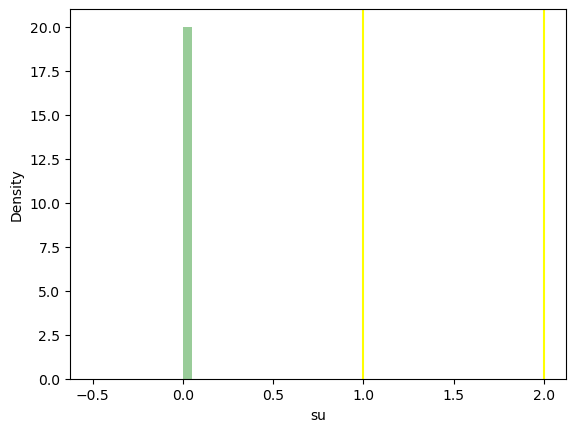

C:\Anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1988: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


The area of su  between the range (1,2):(nan,nan)1.0
Enter the start range,endrange,no for PDF bgr


 200
 300
 350


C:\Users\Admin\AppData\Local\Temp\ipykernel_1132\3399699182.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sb.distplot(dataset[cname],kde=True,kde_kws={'color':'pink'},color='Green')


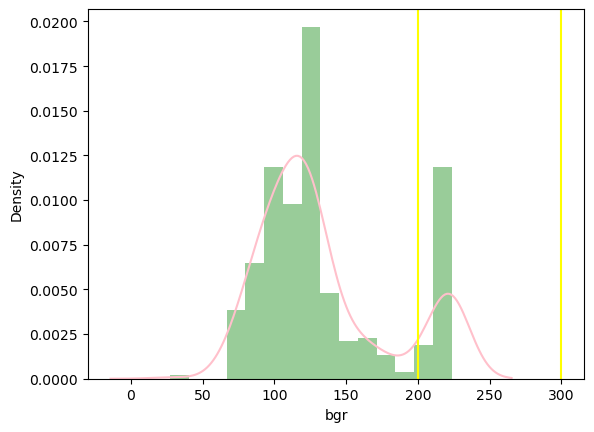

The area of bgr  between the range (200,300):(0.07751635353230012,7.751635353230012)1.0
Enter the start range,endrange,no for PDF bu


 50
 70
 60


C:\Users\Admin\AppData\Local\Temp\ipykernel_1132\3399699182.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sb.distplot(dataset[cname],kde=True,kde_kws={'color':'pink'},color='Green')


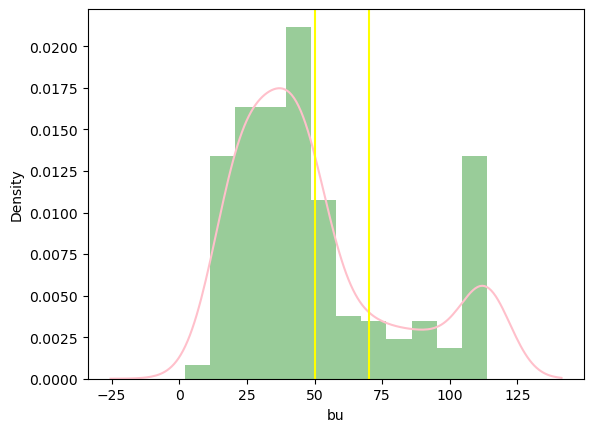

The area of bu  between the range (50,70):(0.24746085655714284,24.746085655714285)0.7474999999999999
Enter the start range,endrange,no for PDF sc


 2
 3
 4


C:\Users\Admin\AppData\Local\Temp\ipykernel_1132\3399699182.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sb.distplot(dataset[cname],kde=True,kde_kws={'color':'pink'},color='Green')


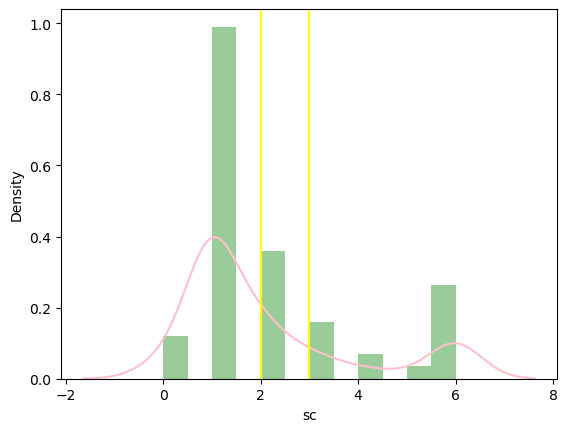

The area of sc  between the range (2,3):(0.2216142017111337,22.16142017111337)0.85
Enter the start range,endrange,no for PDF sod


 130
 140
 200


C:\Users\Admin\AppData\Local\Temp\ipykernel_1132\3399699182.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sb.distplot(dataset[cname],kde=True,kde_kws={'color':'pink'},color='Green')


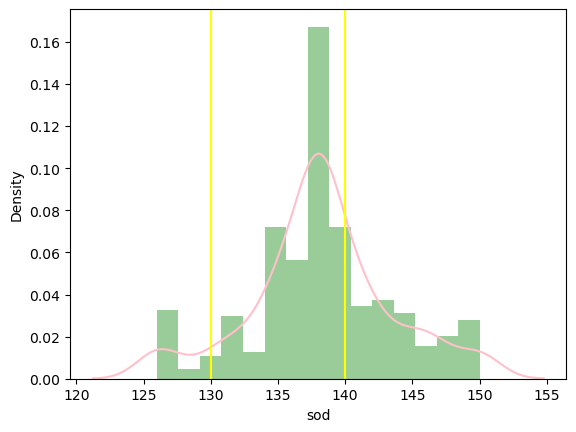

The area of sod  between the range (130,140):(0.5473100588946918,54.731005889469174)1.0
Enter the start range,endrange,no for PDF pot


 2
 4
 6


C:\Users\Admin\AppData\Local\Temp\ipykernel_1132\3399699182.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sb.distplot(dataset[cname],kde=True,kde_kws={'color':'pink'},color='Green')


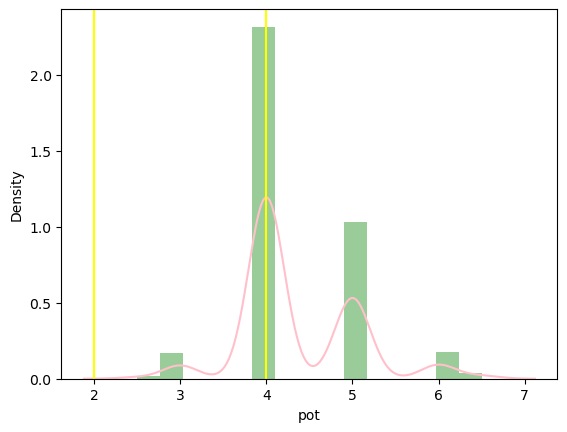

The area of pot  between the range (2,4):(0.08657368948130106,8.657368948130106)0.99
Enter the start range,endrange,no for PDF hemo


 12
 16
 14


C:\Users\Admin\AppData\Local\Temp\ipykernel_1132\3399699182.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sb.distplot(dataset[cname],kde=True,kde_kws={'color':'pink'},color='Green')


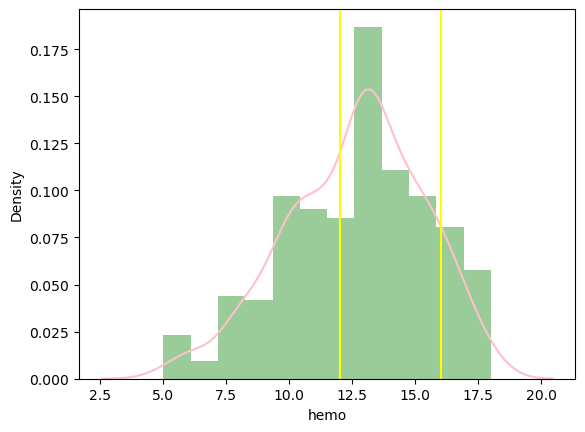

The area of hemo  between the range (12,16):(0.518224105016043,51.822410501604296)0.745


In [29]:
cal_PDF(dataset)

Example:
Age: 60-70 17.6% of people are within this age 
BP: 60-90  82.5% of people are having BP within this range.

In [32]:
def std_normal(dataset):
    for cname in quan:
        mean=dataset[cname].mean()
        std=dataset[cname].std()
        values=[i for i in dataset[cname]]
        z_score=[((j-mean)/std) for j in values]
        print("The Z_SCORE plot of",cname)
        sb.displot(z_score,kde=True)
        plt.show()
    return

The Z_SCORE plot of age


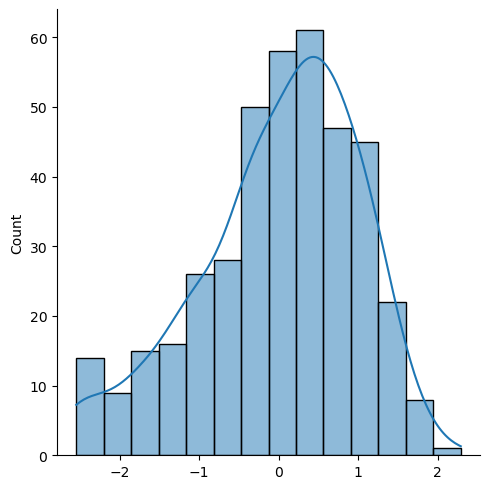

The Z_SCORE plot of bp


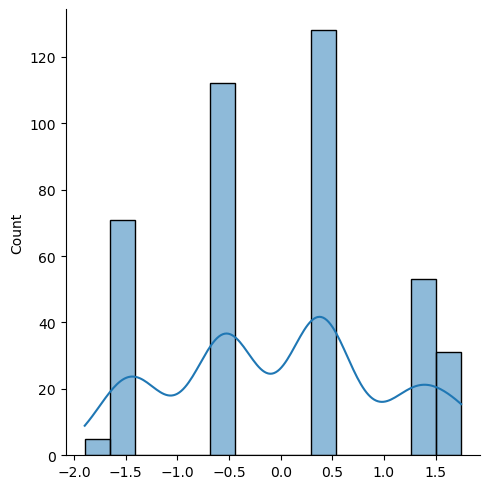

C:\Users\Admin\AppData\Local\Temp\ipykernel_1132\4154691067.py:6: RuntimeWarning: invalid value encountered in scalar divide
  z_score=[((j-mean)/std) for j in values]


The Z_SCORE plot of sg


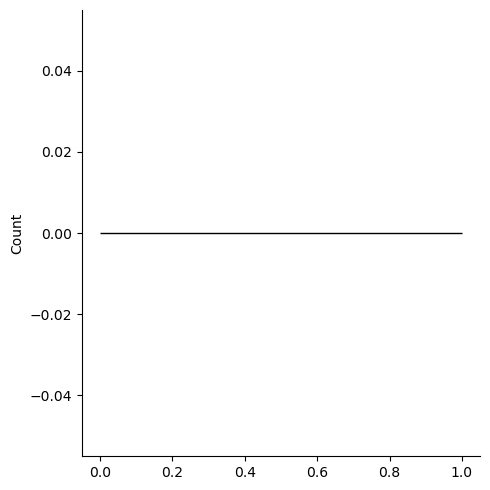

The Z_SCORE plot of al


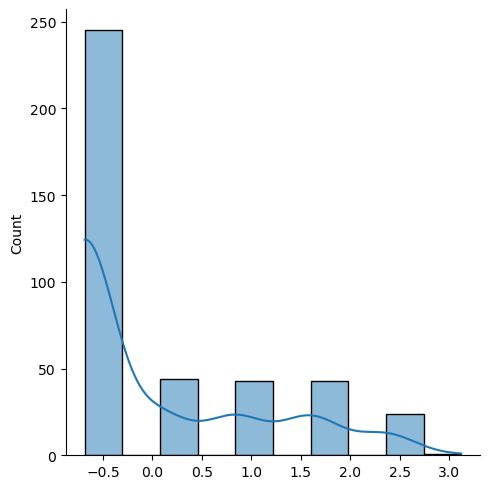

C:\Users\Admin\AppData\Local\Temp\ipykernel_1132\4154691067.py:6: RuntimeWarning: invalid value encountered in scalar divide
  z_score=[((j-mean)/std) for j in values]


The Z_SCORE plot of su


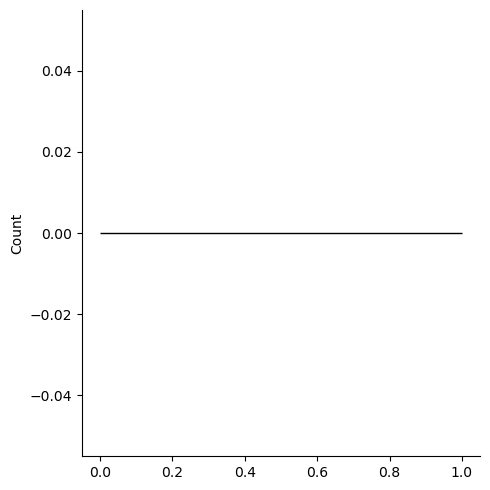

The Z_SCORE plot of bgr


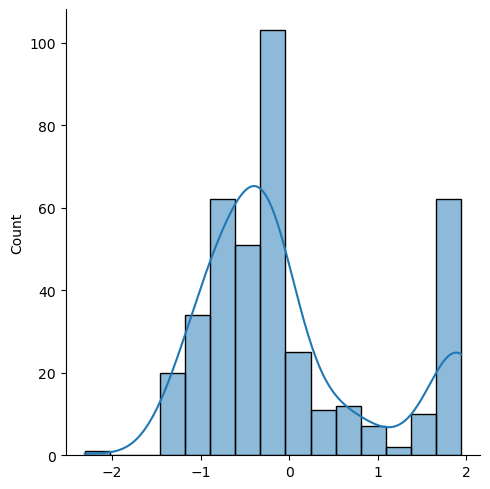

The Z_SCORE plot of bu


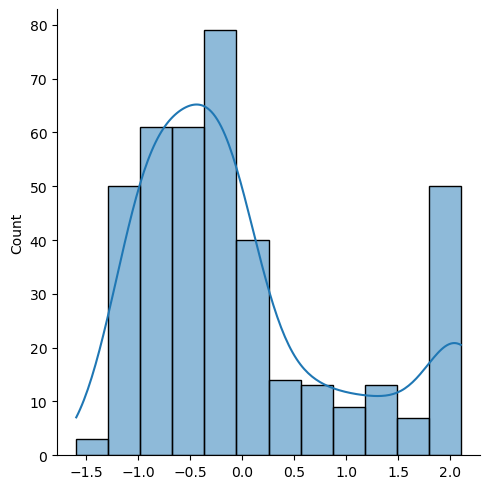

The Z_SCORE plot of sc


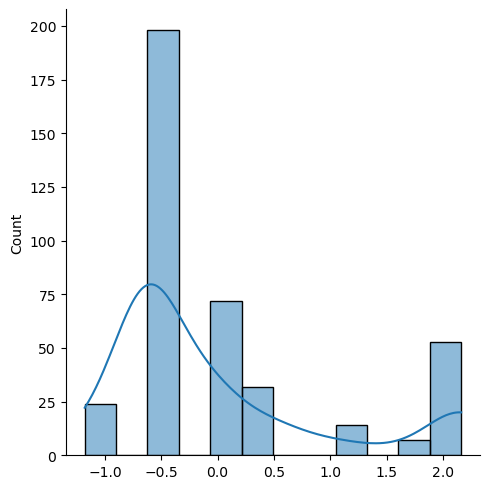

The Z_SCORE plot of sod


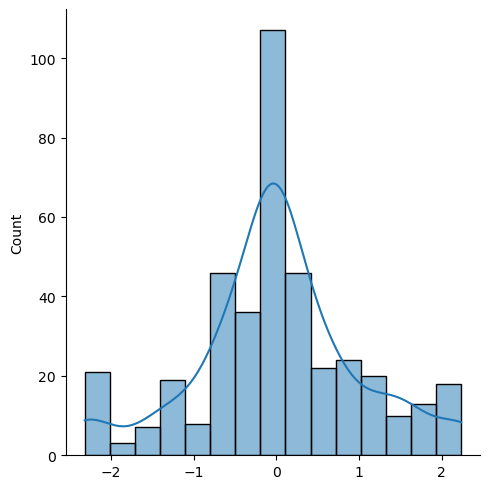

The Z_SCORE plot of pot


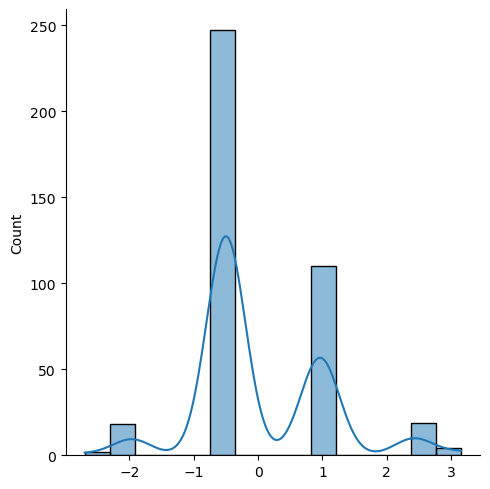

The Z_SCORE plot of hemo


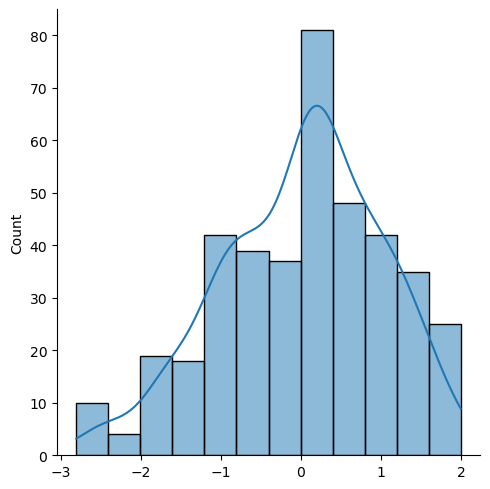

In [33]:
std_normal(dataset)

Z_Score helps to fairly compare the data. it normalize the curve between -ve to +ve value